## Necessary Imports

In [1]:
# Data Analytics and Visualisation Imports
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-Learn Essentials
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Tensorflow
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Loading the Dataset

In [2]:
spaceship = pd.read_csv("../input/spaceship-titanic/train.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**`Important`**

- I am doing the feature engineering early to checkout the correlation of the newly created attributes with the target attribute 

**`Adding a new attributes`**

In [3]:
spaceship["TotalExp"] = spaceship["RoomService"] + spaceship["FoodCourt"] + spaceship["ShoppingMall"] + spaceship["Spa"] + spaceship["VRDeck"]
spaceship["PersonalExp"] = spaceship["RoomService"] + spaceship["FoodCourt"]
spaceship["AddExp"] = spaceship["ShoppingMall"] + spaceship["Spa"] + spaceship["VRDeck"]
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,PersonalExp,AddExp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,118.0,618.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3619.0,6764.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,1283.0,3893.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,373.0,718.0


## Understanding the Dataset

In [4]:
# Information about the dataset
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  TotalExp      7785 non-null   float64
 15  PersonalExp   8331 non-null   float64
 16  AddExp        8125 non-null   float64
dtypes: bool(1), float64(9), object(7)
memory usage: 1.1+ MB


In [5]:
# Statistical Parameters of the Dataset
spaceship.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,PersonalExp,AddExp
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000,8331.000000,8125.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541,684.178490,790.508431
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241,1729.372416,1830.832005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000,4.000000,53.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000,701.000000,798.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,29813.000000,28600.000000


**`Viewing the Distribution of the Dataset`**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>,
        <Axes: title={'center': 'FoodCourt'}>],
       [<Axes: title={'center': 'ShoppingMall'}>,
        <Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>],
       [<Axes: title={'center': 'TotalExp'}>,
        <Axes: title={'center': 'PersonalExp'}>,
        <Axes: title={'center': 'AddExp'}>]], dtype=object)

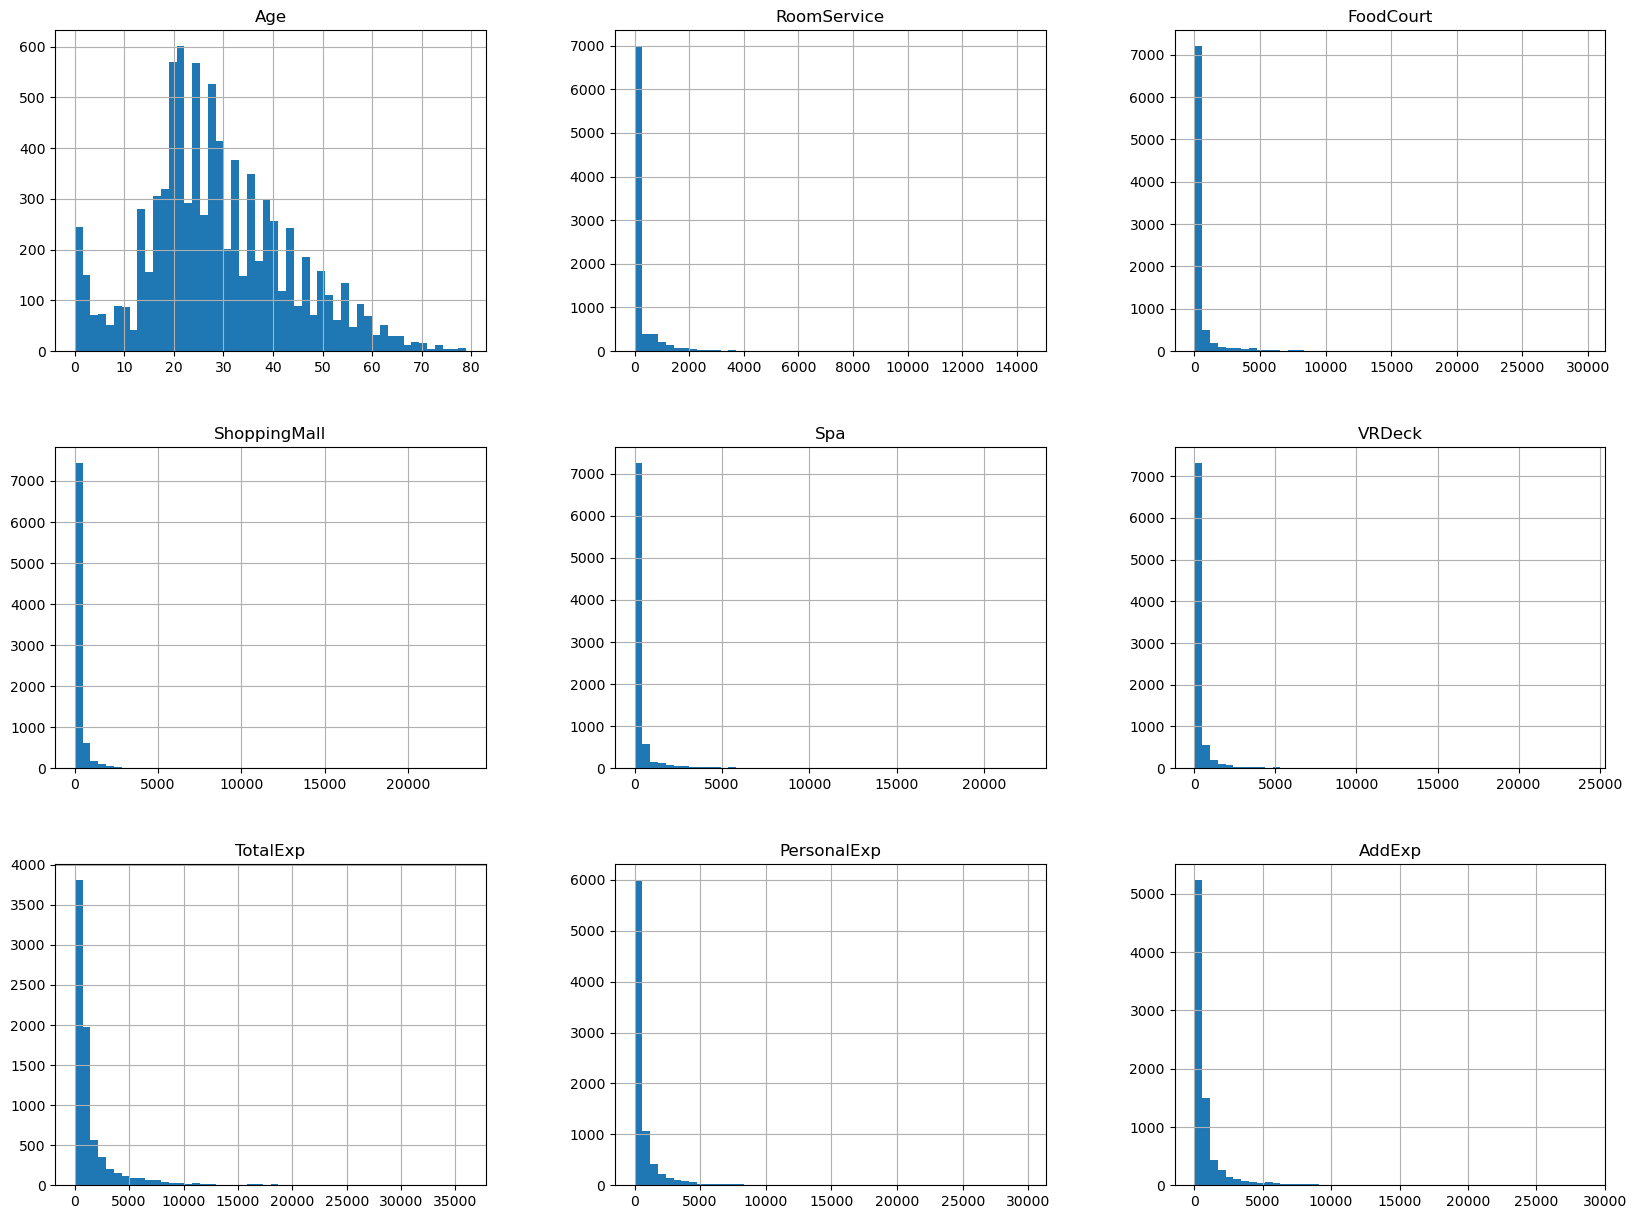

In [6]:
spaceship.hist(figsize=(20, 15), bins=50)

**`Calculating the Correlation Coefficient`**

In [7]:
corr_matrix = spaceship[["Age", "RoomService", "Spa", "ShoppingMall", "PersonalExp",
                         "FoodCourt", "VRDeck", "TotalExp", "AddExp", "Transported"]].corr()
corr_matrix["Transported"].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
PersonalExp    -0.049521
Age            -0.075026
TotalExp       -0.197671
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
AddExp         -0.262029
Name: Transported, dtype: float64

**`Inference`**

- `Food Court` has a `High Positive Correlation` with the target attribute.
    - ⬆️ Food Court bill = ⬆️ chance of successful Transport
    

- `Shopping Mall` has a `Small Positive Correlation` with the target attribute.
    - ⬆️ Shopping Mall bill = ⬆️ chance of successful Transport
    
    
- `Age` has a `Small Negative Correlation` hence an inverse relationship with the target attribute.
    - ⬇️ Age (Middle Aged) = ⬆️ chance of successful Transport
    

- `Total Expense` has a `Large Negative Correlation` hence an inverse relationship with the target attribute.
    - ⬇️ Total Expense = ⬆️ chance of successful Transport
    
    
- `Room Service` has a `Large Negative Correlation` hence an inverse relationship with the target attribute.
    - ⬇️ Room Service charge = ⬆️ chance of successful Transport
    
    
- `Additional Expense (AddExp)` has a `Large Negative Correlation` hence an inverse relationship with the target attribute.
    - ⬇️ Additional Expense = ⬆️ chance of successful Transport

## Visualising the Correlations using Data Visualisation

In [8]:
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,PersonalExp,AddExp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,118.0,618.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3619.0,6764.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,1283.0,3893.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,373.0,718.0


<Axes: xlabel='HomePlanet', ylabel='count'>

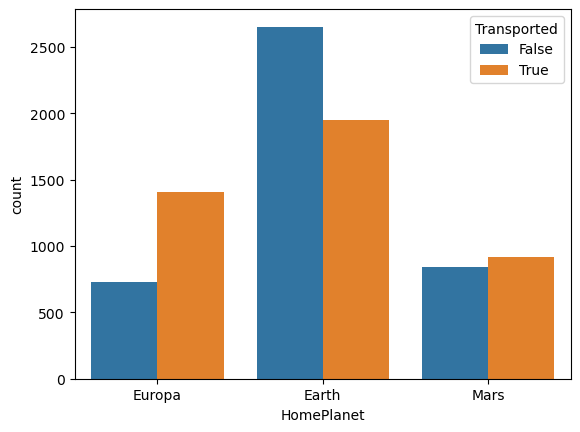

In [9]:
sns.countplot(spaceship, x="HomePlanet", hue="Transported")

**`Inference`**

- Most people who chose the transport service are from Earth but majority of the passengers couldnt be transported to their destination.
- Most `successful transportation` was from `Europa` as the majority reached their destination.

<Axes: xlabel='Destination', ylabel='count'>

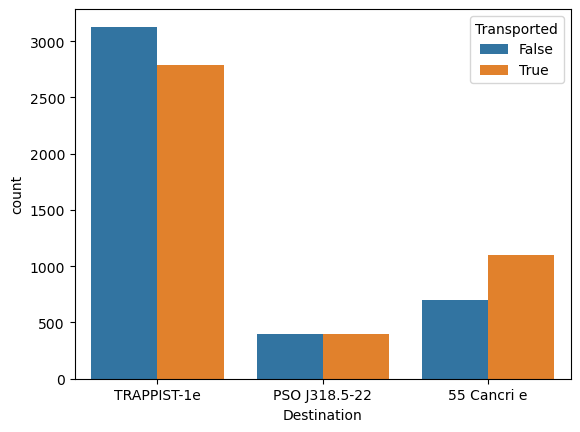

In [10]:
sns.countplot(spaceship, x="Destination", hue="Transported")

**`Inference`**

- Most successfull transport destination was `55 Cancri e`
- Most of the passengers were transported to `Trappist - 1e`

<Axes: xlabel='FoodCourt', ylabel='AddExp'>

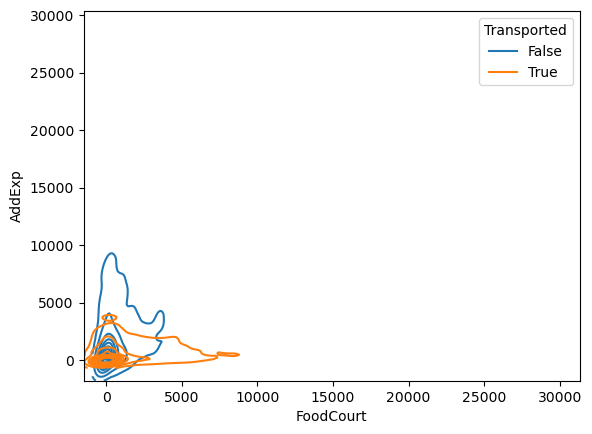

In [11]:
sns.kdeplot(spaceship, x="FoodCourt", y="AddExp", hue="Transported")

**`Inference`**

- Most of the passenger who were transported successfully have High Food Court bill `Linear Relation`
- Most of the passenger who werent transported have High Additional Expense bill `Inverse Relation`
- **`Inline with the Correlation`**

<Axes: xlabel='VIP', ylabel='count'>

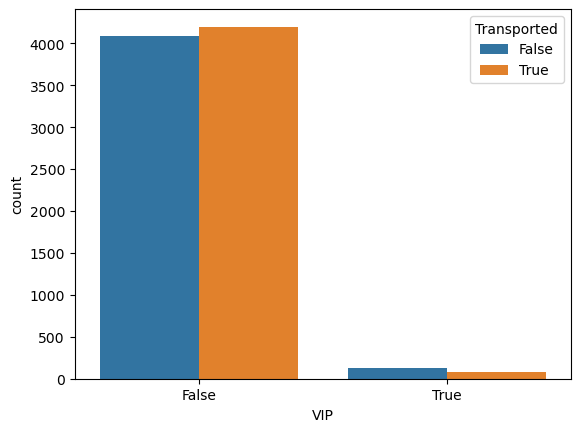

In [12]:
sns.countplot(spaceship, x="VIP", hue="Transported")

**`Inference`**

- VIP's are only a small percent of the traveller onboard.
- Most `VIP's werent transported` to their destination.

<Axes: xlabel='Age', ylabel='TotalExp'>

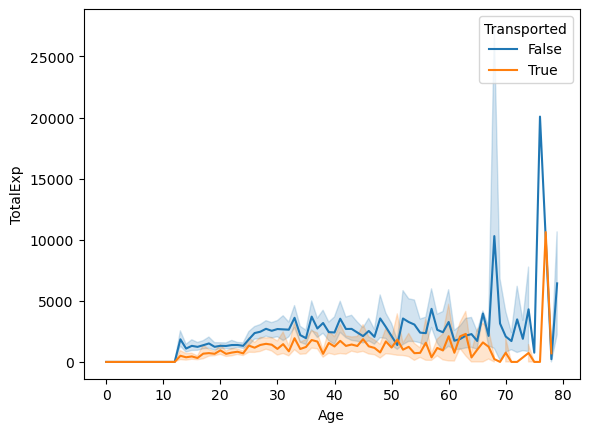

In [13]:
sns.lineplot(spaceship, x="Age", y="TotalExp", hue="Transported")

**`Inference`**

- Most of the passenger who were transported have `low Total Expense`
- Most of the passenger who were transported have `spent less` than their `compatriots in the same age group`
- **`Inline with the Correaltion`**

**`Important`**

- There are insights that can be derived from the dataset.
- I have limited myself to the correlation coefficient calculations.

## Data Cleaning

In [14]:
# Checking for Unfilled Values
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
TotalExp        908
PersonalExp     362
AddExp          568
dtype: int64

In [15]:
# Removing unnecessary columns
spaceship.drop(["PassengerId", "Cabin", "Name", "TotalExp"], axis=1, inplace=True)
spaceship.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PersonalExp,AddExp
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,118.0,618.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3619.0,6764.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1283.0,3893.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,373.0,718.0


In [16]:
# Seperating the Targets
spaceship_labels = spaceship["Transported"]
spaceship_labels[:5]

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [17]:
# Splitting the Categorical and Numerical attributes
cat_attr = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
num_attr = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "AddExp", "PersonalExp"]
spaceship_cat = spaceship[cat_attr]
spaceship_num = spaceship[num_attr]

## Working with the Numerical Attributes

**`Imputing the Missing Values in the Numerical Attributes`**

In [18]:
# Initialising the Imputer
mean_imputer = SimpleImputer(strategy="mean")

# Training and Transforming the Numerical Columns
num_imputed = mean_imputer.fit_transform(spaceship_num)

# Recreating the Dataframe
spaceship_num_imputed = pd.DataFrame(num_imputed, index=spaceship_num.index, columns=spaceship_num.columns)
spaceship_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
 6   AddExp        8693 non-null   float64
 7   PersonalExp   8693 non-null   float64
dtypes: float64(8)
memory usage: 543.4 KB


**`Scaling the Values to be within a Standard Range`**

In [19]:
# Initialising the Scaler
scaler = StandardScaler()

# Training and Scaling the Numerical Columns
num_scaled = scaler.fit_transform(spaceship_num_imputed)

# Recreating the DataFrame
spaceship_num_scaled = pd.DataFrame(num_scaled, index=spaceship_num.index, columns=spaceship_num.columns)
spaceship_num_scaled.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AddExp,PersonalExp
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03
mean,-1.761440e-16,5.987260e-17,7.356361e-17,7.724179e-17,-5.803351e-17,-6.436816e-17,-2.104737e-17,-1.675616e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-2.010564e+00,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-4.466403e-01,-4.041506e-01
25%,-6.156918e-01,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-4.466403e-01,-4.041506e-01
50%,-1.274865e-01,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-3.681048e-01,-3.970621e-01
75%,5.699497e-01,-2.223546e-01,-2.133024e-01,-2.154885e-01,-1.975250e-01,-2.063679e-01,0.000000e+00,0.000000e+00
max,3.499182e+00,2.137681e+01,1.841192e+01,3.903403e+01,1.964845e+01,2.102742e+01,1.571247e+01,1.720667e+01


In [20]:
spaceship_num_scaled.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AddExp,PersonalExp
0,0.709437,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,-0.446640,-0.404151
1,-0.336717,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,-0.097468,-0.334447
2,2.034566,-0.275409,1.955616,-0.290817,5.694289,-0.225782,3.375046,1.733626
3,0.290975,-0.340590,0.517406,0.330225,2.683471,-0.098708,1.752920,0.353729
4,-0.894666,0.118709,-0.243409,-0.038048,0.225732,-0.267258,-0.040968,-0.183816


## Building a Pipeline to Automate the Transformations on the Numerical Attributes

In [21]:
num_pipeline = Pipeline([
    ("mean_imputer", SimpleImputer(strategy="mean")),
    ("std_scaler", StandardScaler())
])

# Transforming the Data at once using the Pipeline
spaceship_num_tr = num_pipeline.fit_transform(spaceship_num)
spaceship_num_tr[:5]

array([[ 0.70943692, -0.34058987, -0.28731404, -0.29081703, -0.27666342,
        -0.26902263, -0.44664029, -0.4041506 ],
       [-0.33671733, -0.1753636 , -0.28166908, -0.24896783,  0.2115053 ,
        -0.23019432, -0.09746792, -0.3344469 ],
       [ 2.03456565, -0.27540886,  1.95561575, -0.29081703,  5.69428913,
        -0.22578201,  3.37504557,  1.73362637],
       [ 0.29097522, -0.34058987,  0.51740602,  0.33022501,  2.68347076,
        -0.09870755,  1.7529196 ,  0.35372944],
       [-0.89466627,  0.11870883, -0.24340881, -0.0380479 ,  0.22573244,
        -0.2672577 , -0.04096754, -0.18381603]])

In [22]:
spaceship_num_tr.shape

(8693, 8)

## Working with the Categorical Attributes

**`Imputing the Missing Values in the Categorical Attributes`**

In [23]:
# Initialising the Imputer
mode_imputer = SimpleImputer(strategy="most_frequent")

# Training and Transforming the Categorical Columns
cat_imputed = mode_imputer.fit_transform(spaceship_cat)

# Recreating the DataFrame
spaceship_cat_imputed = pd.DataFrame(cat_imputed, index=spaceship_cat.index, columns=spaceship_cat.columns)
spaceship_cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   8693 non-null   object
 1   CryoSleep    8693 non-null   object
 2   Destination  8693 non-null   object
 3   VIP          8693 non-null   object
dtypes: object(4)
memory usage: 271.8+ KB


**`Encoding the Categorical Values`**

In [24]:
# Initialising the Encoder
onehot_encoder = OneHotEncoder()

# Training and Encoding the values using the Encoder
spaceship_cat_encoded = onehot_encoder.fit_transform(spaceship_cat_imputed)
spaceship_cat_encoded.shape

(8693, 10)

In [25]:
# Viewing the Categories used by the Encoder
onehot_encoder.categories_

[array(['Earth', 'Europa', 'Mars'], dtype=object),
 array([False, True], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object),
 array([False, True], dtype=object)]

In [26]:
# Converting the Sparse Matrix to a Numpy Array
spaceship_cat_encoded = spaceship_cat_encoded.toarray()
spaceship_cat_encoded[:5]

array([[0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.]])

## Building a Pipeline to Automate the Transformations on the Categorical Attributes

In [27]:
cat_pipeline = Pipeline([
    ("mode_imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot_encoder", OneHotEncoder())
])

# Transforming the Data using the Pipeline
spaceship_cat_tr = cat_pipeline.fit_transform(spaceship_cat)
spaceship_cat_tr = spaceship_cat_tr.toarray()
spaceship_cat_tr[:5]

array([[0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.]])

## Building a Pipeline to automate Transformations on all the Columns

In [28]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", cat_pipeline, cat_attr)
])

# Using the Pipeline to Perform all the required Transformations on the Data
spaceship_prepared = full_pipeline.fit_transform(spaceship)
spaceship_prepared.shape

(8693, 18)

In [29]:
spaceship_prepared[:5]

array([[ 0.70943692, -0.34058987, -0.28731404, -0.29081703, -0.27666342,
        -0.26902263, -0.44664029, -0.4041506 ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ],
       [-0.33671733, -0.1753636 , -0.28166908, -0.24896783,  0.2115053 ,
        -0.23019432, -0.09746792, -0.3344469 ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ],
       [ 2.03456565, -0.27540886,  1.95561575, -0.29081703,  5.69428913,
        -0.22578201,  3.37504557,  1.73362637,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ],
       [ 0.29097522, -0.34058987,  0.51740602,  0.33022501,  2.68347076,
        -0.09870755,  1.7529196 ,  0.35372944,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.   

## Converting the Target Attribute to Binary Values

In [30]:
def target_transform(data):
    if data:
        return 1
    return 0

spaceship_labels = spaceship_labels.apply(target_transform)
spaceship_labels[:5]

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

## Splitting the Training and Testing Sets

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(spaceship_prepared, spaceship_labels, test_size=0.12, random_state=17)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_valid.shape}")
print(f"Shape of y_test: {y_valid.shape}")

Shape of X_train: (7649, 18)
Shape of y_train: (7649,)
Shape of X_test: (1044, 18)
Shape of y_test: (1044,)


## Model Selection

**`Using Cross Validation Score`**
- We test the models using Cross Validation Score.
- This method splits the Training sets into smaller sets for Training and Validation

**`Using Mean Squared Error`**
- We test the model after fitting it to the training set
- The loss score is calulated using the mean_squared_error

**`Applying Logistic Regression`**

In [32]:
# Initialising the Logistic Regression Model
log_reg = LogisticRegression()

# Training the Model and Making Predictions on the Validation set
log_scores = cross_val_score(log_reg, spaceship_prepared, spaceship_labels, cv=10, 
                                 scoring="neg_mean_squared_error")

# Viewing the Scores
log_rmse = np.sqrt(-log_scores)
print(f"Logistic Regression Loss Scores:\n{log_rmse}")
print(f"\nLogistic Regression Mean: {log_rmse.mean()}")
print(f"\nLogistic Regression Standard Deviation: {log_rmse.std()}")

Logistic Regression Loss Scores:
[0.45485883 0.47464445 0.46977618 0.45638294 0.46512431 0.47004639
 0.4737044  0.45385448 0.42369409 0.47853824]

Logistic Regression Mean: 0.4620624310085182

Logistic Regression Standard Deviation: 0.01523667913226434


**`Applying Decision Trees`**

In [33]:
# Initialising the Decision Tree Model
tree_cls = DecisionTreeClassifier()

# Training the Model
tree_cls.fit(X_train, y_train)

# Making Predictions
tree_predictions = tree_cls.predict(X_valid)
tree_mse = mean_squared_error(y_valid, tree_predictions)
print(f"Decision Tree Classifier Loss: {np.sqrt(tree_mse)}")

Decision Tree Classifier Loss: 0.5141671091113803


**`Appling Random Forest`**

In [34]:
# Initialising the Random Forest Model
forest_cls = RandomForestClassifier()

# Training and Validating the Model
forest_score = cross_val_score(forest_cls, spaceship_prepared, spaceship_labels, cv=10,
                              scoring="neg_mean_squared_error")

# Viewing the Score
forest_rmse = np.sqrt(-forest_score)
print(f"Random Forest Classifier Loss Score:\n{forest_rmse}")
print(f"\nRandom Forest Classifier Mean: {forest_rmse.mean()}")
print(f"\nRandom Forest Classifier Standard Deviation: {forest_rmse.std()}")

Random Forest Classifier Loss Score:
[0.44334154 0.49130368 0.47343208 0.47733437 0.47733437 0.46264363
 0.4663597  0.45003516 0.45512046 0.47004639]

Random Forest Classifier Mean: 0.46669513918528394

Random Forest Classifier Standard Deviation: 0.013645621684215502


## Fine Tuning the Model

- GridSearchCV can be used to automate the fine tuning process.
- It finds the best estimator given a set of parameters and hyperparameters to be used on the model

**`Please remove the comments incase you want to use GridSearchCV to find the best estimator`**

In [35]:
# A list of Dictionaries containing all the possible param combinations to train
param_grid = [
    {
        "n_estimators":[1000, 1500], 
        "max_features": [8, 12],
    }
]

# Initialising the Model
forest_cls = RandomForestClassifier()

# Using Grid Search to Train the model
grid_search = GridSearchCV(forest_cls, param_grid, cv=5, return_train_score=True,
                          scoring="neg_mean_squared_error")

# Training using Grid Search
# grid_search.fit(spaceship_prepared, spaceship_labels)

In [36]:
# print(f"Best Params by Grid Search: {grid_search.best_params_}")

In [37]:
# print(f"Best Estimator and its Hyperparams by Grid Search:\n{grid_search.best_estimator_}")

In [38]:
# Loading the Best Estimator from GridSearchCV
# final_model = grid_search.best_estimator_

# Making Predictions
# predictions = final_model.predict(X_valid)

# Calculating the Loss
# final_mse = mean_squared_error(y_valid, predictions)
# print("Final Loss after GridSearchCV: ", np.sqrt(final_mse))

**`Important`**

- The best estimator found using GridSearchCV has a loss of 0.23

## Trying a Deep Learning Model

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

In [40]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
240/240 [==============================] - 2s 3ms/step - loss: 0.5579 - accuracy: 0.7526 - val_loss: 0.4727 - val_accuracy: 0.7289
Epoch 2/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4756 - accuracy: 0.7621 - val_loss: 0.4767 - val_accuracy: 0.7040
Epoch 3/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4649 - accuracy: 0.7594 - val_loss: 0.4584 - val_accuracy: 0.7883
Epoch 4/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.7622 - val_loss: 0.4577 - val_accuracy: 0.7452
Epoch 5/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4519 - accuracy: 0.7668 - val_loss: 0.4409 - val_accuracy: 0.7538
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4530 - accuracy: 0.7655 - val_loss: 0.4486 - val_accuracy: 0.7519
Epoch 7/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.7627 - val_loss: 0.4297 - val_accuracy: 0.7864
Epoch 

<Axes: >

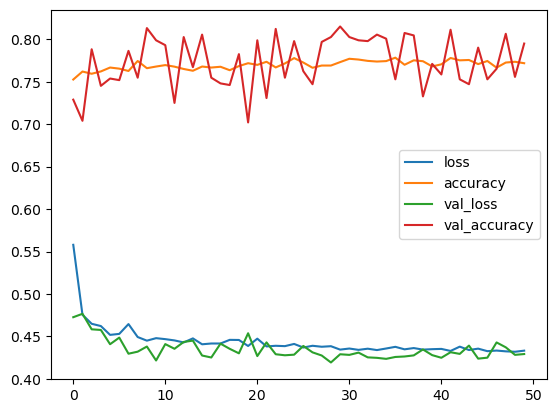

In [41]:
pd.DataFrame(history.history).plot()

In [42]:
# Saving the Final Model
# joblib.dump(final_model, "SpaceshipClassifier.pkl")
joblib.dump(model, "DeepSpaceship.pkl")

['DeepSpaceship.pkl']

## That brings me to the end of this Notebook.

- **Please share your valuable feedback in the comments**
- **I am open to Suggestions and Constructive Comments**

🙂🙃